In [3]:
import numpy as np
import xarray as xr
import scipy as sp
import matplotlib.pyplot as plt
import oceanspy as ospy

In [4]:
df = xr.open_dataset('C:/Users/eirik/Master/Data/new_dataset.nc')

In [5]:
# display(df)

In [6]:
from animation import animation_local
from IPython.display import Image, display
df_depth = xr.open_dataset('Data/depth.nc')
depth = df_depth['Depth']

In [7]:
Okubo_Weiss = df['Okubo_Weiss']*(1/(10**(-9)))

In [8]:
cmap = 'seismic'
# animation_local(Okubo_Weiss,'Okubo-Weiss parameter','10$^-$$^9$ s$^-$$^2$',depth,vmin=-1,vmax=1,cmap=cmap)
# display(Image('Okubo-Weiss parameter.gif'))

In [9]:
import cmocean
import cmocean.cm as cmo
from animation import animation_local_3D
# Sea Ice area
SIarea = df['SIarea']
cmap = cmo.ice
# animation_local_3D(SIarea,'Sea_Ice_Area','m$^2$ m$^-$$^2$',depth,vmin=0,vmax=1,cmap=cmap)

In [10]:
# display(Image('Sea_Ice_Area.gif'))

In [11]:
# Ertel = df['Ertel_PV']
# cmap = 'seismic'
# animation_local(Ertel,'Ertel Potential Vorticity','m$^-$$^1$ s$^-$$^1$',depth,0,0,cmap=cmap)

In [12]:
SIarea = SIarea.resample(time='1M').mean(dim='time')

c:\Users\eirik\anaconda3\envs\MSc_Env1\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


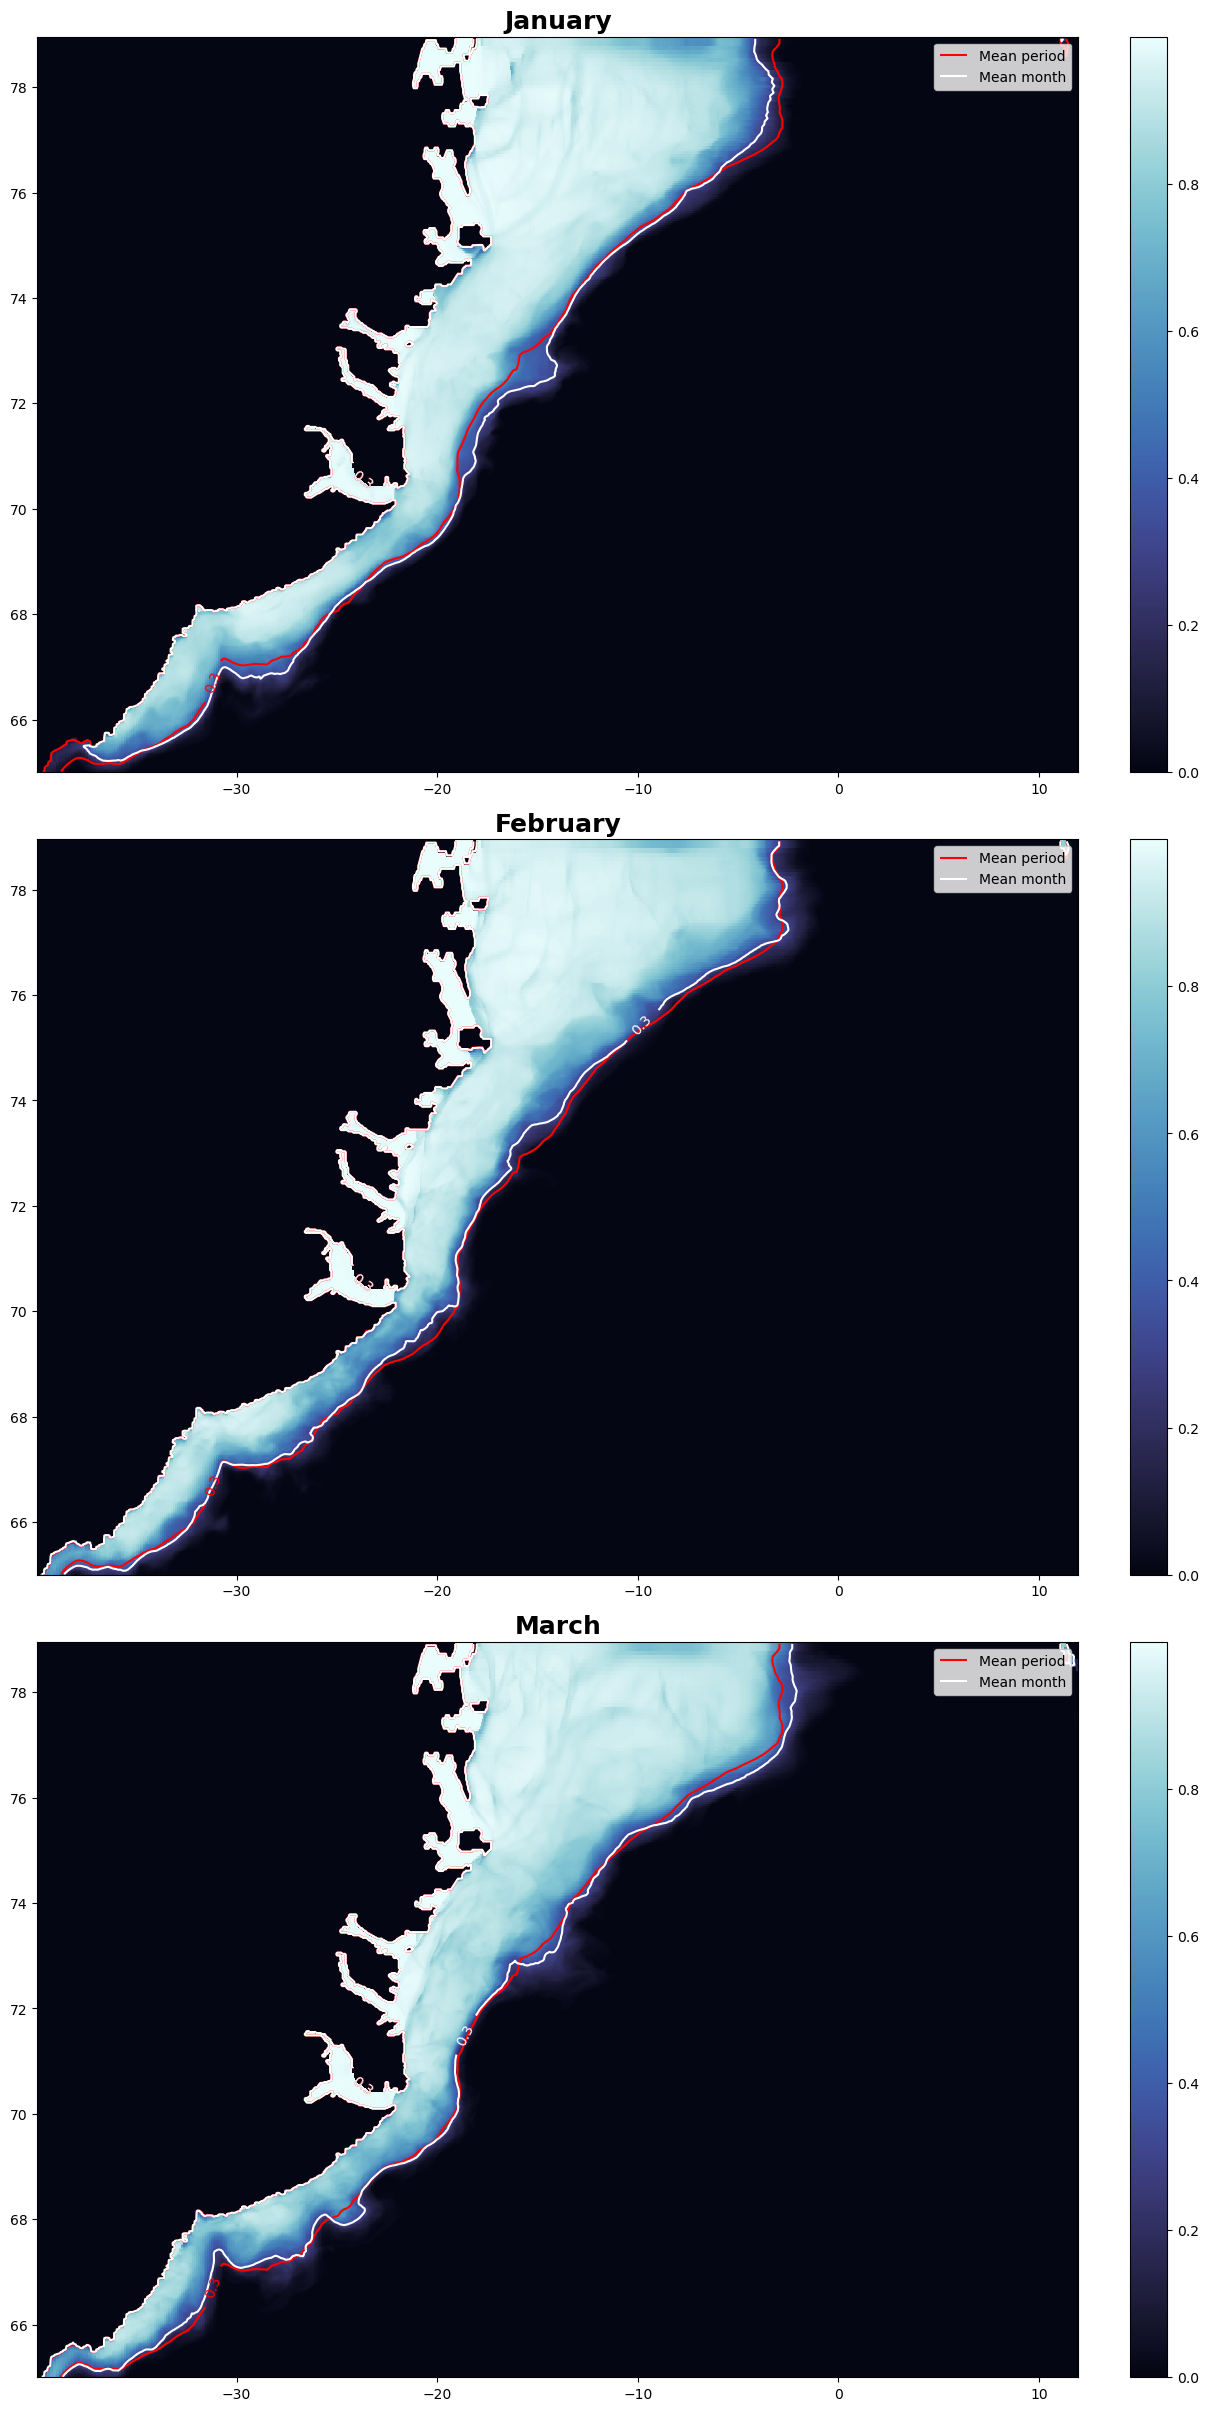

In [13]:
mean_SIarea = SIarea.mean(dim='time')

fig, (ax,ax2,ax3) = plt.subplots(3,1,figsize=[12,24],layout='constrained')
cmap = cmo.ice

mesh = ax.pcolor(SIarea.X,SIarea.Y,SIarea[0],cmap=cmap)
cbar = fig.colorbar(mesh,ax=ax)
cntr1 = ax.contour(mean_SIarea.X,mean_SIarea.Y,mean_SIarea,[0.3],colors='red')
ax.clabel(cntr1, fmt="%2.1f", use_clabeltext=True)
cntr2 = ax.contour(SIarea.X,SIarea.Y,SIarea[0],[0.3],colors='white')
ax.clabel(cntr2, fmt="%2.1f", use_clabeltext=True)

mesh = ax2.pcolor(SIarea.X,SIarea.Y,SIarea[1],cmap=cmap)
cbar = fig.colorbar(mesh,ax=ax2)
cntr3 = ax2.contour(mean_SIarea.X,mean_SIarea.Y,mean_SIarea,[0.3],colors='red')
ax2.clabel(cntr3, fmt="%2.1f", use_clabeltext=True)
cntr4 = ax2.contour(SIarea.X,SIarea.Y,SIarea[1],[0.3],colors='white')
ax2.clabel(cntr4, fmt="%2.1f", use_clabeltext=True)

mesh = ax3.pcolor(SIarea.X,SIarea.Y,SIarea[2],cmap=cmap)
cbar = fig.colorbar(mesh,ax=ax3)
cntr5 = ax3.contour(mean_SIarea.X,mean_SIarea.Y,mean_SIarea,[0.3],colors='red')
ax.clabel(cntr5, fmt="%2.1f", use_clabeltext=True)
cntr6 = ax3.contour(SIarea.X,SIarea.Y,SIarea[2],[0.3],colors='white')
ax3.clabel(cntr6, fmt="%2.1f", use_clabeltext=True)

# Adding the contours to the legend
h1, _ = cntr1.legend_elements()
h2, _ = cntr2.legend_elements()
h3, _ = cntr3.legend_elements()
h4, _ = cntr4.legend_elements()
h5, _ = cntr5.legend_elements()
h6, _ = cntr6.legend_elements()

ax.set_title('January',fontweight='bold',fontsize=18)
ax2.set_title('February',fontweight='bold',fontsize=18)
ax3.set_title('March',fontweight='bold',fontsize=18)

ax.legend([h1[0], h2[0]], ['Mean period', 'Mean month'])
ax2.legend([h3[0], h4[0]], ['Mean period', 'Mean month'])
ax3.legend([h5[0], h6[0]], ['Mean period', 'Mean month'])